# LIFE EXPECTANCY PROJECT

## *Project Objectives*
- Identify dataset and summarize data
- Use matplotlib/seaborn to plot and visualize data

## *Questions seeked to be answered*
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?
  

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

life_data = pd.read_csv('all_data.csv')
print(life_data.head())

# Set style of seaborn
sns.set_style('darkgrid')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


### Observe the Dataframe

In [27]:
print(life_data.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [5]:
print(life_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [6]:
print(life_data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [39]:
#Rescale the GDP $ Amount
life_data.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)
life_data.GDP = life_data.GDP /1e9
print(life_data.head())

  Country  Year  Life Expectancy        GDP
0   Chile  2000             77.3  77.860932
1   Chile  2001             77.3  70.979924
2   Chile  2002             77.8  69.736811
3   Chile  2003             77.9  75.643460
4   Chile  2004             78.0  99.210393


In [43]:
max = life_data['Life Expectancy'].max()
print('Max Life Expectancy (Years) :' + str(max))
min = life_data['Life Expectancy'].min()
print('Min Life Expectancy (Years) :' + str(min))
gdpmax = life_data['GDP'].max()
print('Max GDP (Billions USD) :' + str(gdpmax))
gdpmin = life_data['GDP'].min()
print('Min GDP (Billions USD) :' + str(gdpmin))


Max Life Expectancy (Years) :81.0
Min Life Expectancy (Years) :44.3
Max GDP (Billions USD) :18100.0
Min GDP (Billions USD) :4.4157028


### Life Expectancy Analysis

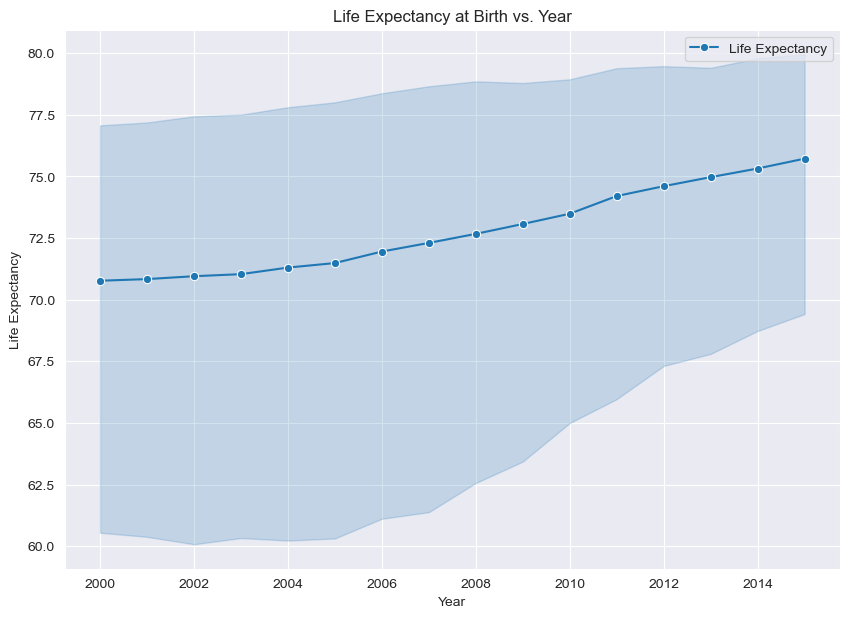

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize = (10,7))
sns.lineplot(x= 'Year', y = 'Life Expectancy', data = life_data, marker = 'o', label = 'Life Expectancy')
plt.title('Life Expectancy at Birth vs. Year')
plt.show()
plt.clf()

In the figure above we see an overall positive increase YOY for Life Expectancy. It's interesting to note that as the Life Expectancy increases, the lower band of the confidence interval tightens. Intuitivley this means there must be less variance in the distribution of Life Expectancy in years 2010-2014 as compared to 2001-2006.

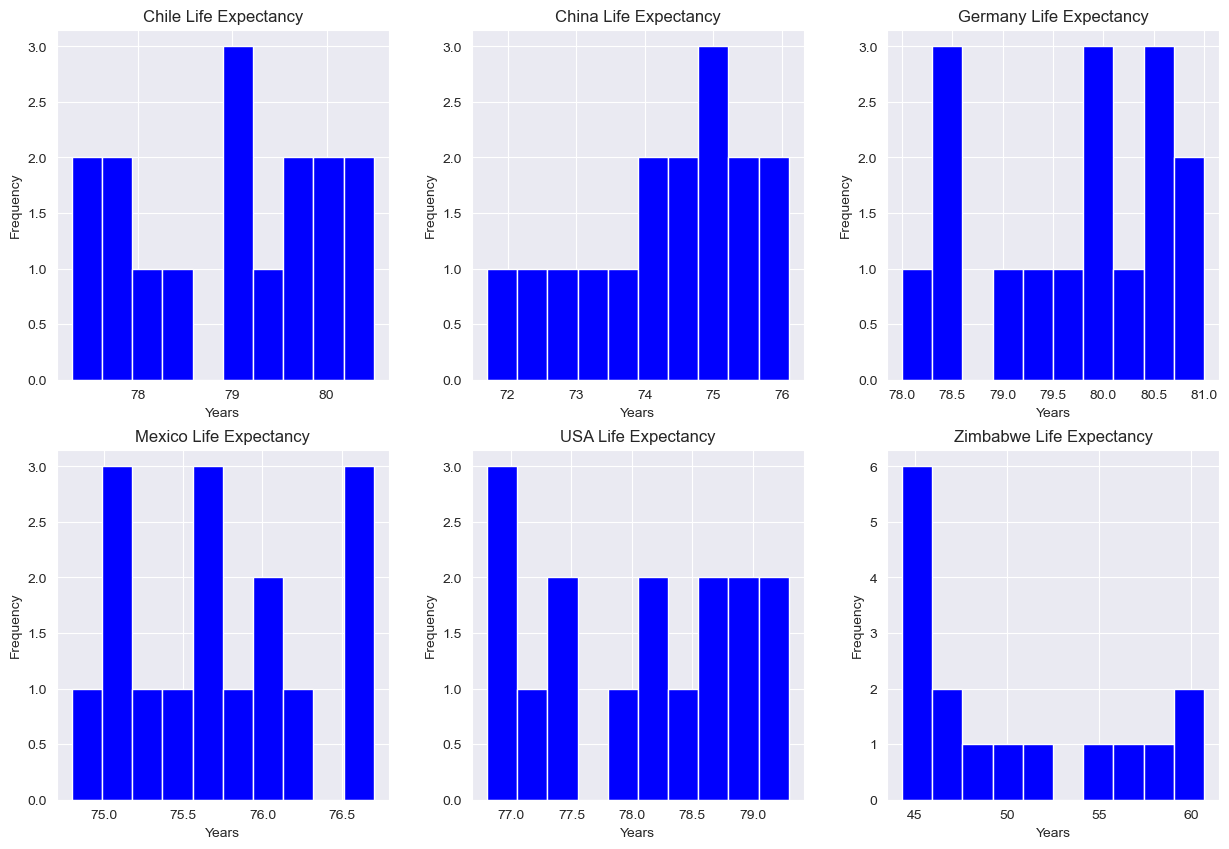

In [12]:
#Life Expectancy vs Year by Country
# Create a Figure
fig = plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace = .25)

# Create the First Subplot, Chile
chile_data = life_data[life_data['Country'] == 'Chile']
ax1 = plt.subplot(2, 3, 1) # 3 Rows, 2 Columns, 1st Subplot
plt.hist(chile_data['Life Expectancy'], color = 'blue')
plt.title('Chile Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Create the Second Subplot, China
china_data = life_data[life_data['Country'] == 'China']
ax2 = plt.subplot(2, 3, 2) 
plt.hist(china_data['Life Expectancy'], color = 'blue')
plt.title('China Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Create the Third Subplot, Germany
germany_data = life_data[life_data['Country'] == 'Germany']
ax3 = plt.subplot(2, 3, 3)
plt.hist(germany_data['Life Expectancy'], color = 'blue')
plt.title('Germany Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Create the Fourth Subplot, Germany
mexico_data = life_data[life_data['Country'] == 'Mexico']
ax4 = plt.subplot(2, 3, 4) 
plt.hist(mexico_data['Life Expectancy'], color = 'blue')
plt.title('Mexico Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Create the Fifth Subplot, USA
USA_data = life_data[life_data['Country'] == 'United States of America']
ax4 = plt.subplot(2, 3, 5) 
plt.hist(USA_data['Life Expectancy'], color = 'blue')
plt.title('USA Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Create the Sixth Subplot, Zimbabwe
zimbabwe_data = life_data[life_data['Country'] == 'Zimbabwe']
ax4 = plt.subplot(2, 3, 6) 
plt.hist(zimbabwe_data['Life Expectancy'], color = 'blue')
plt.title('Zimbabwe Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')


plt.show()
plt.close()


Based on the graphs you can see that most countries frequency range from 70-80 years of life expectancy. However, Zimbabwe greatly lowers the average considering the right skewed histogram peaks at around 40 with a max observation of about 60 years.

Let's look at all the countries on a box plot to easily spot Zimbabwe as an outlier.

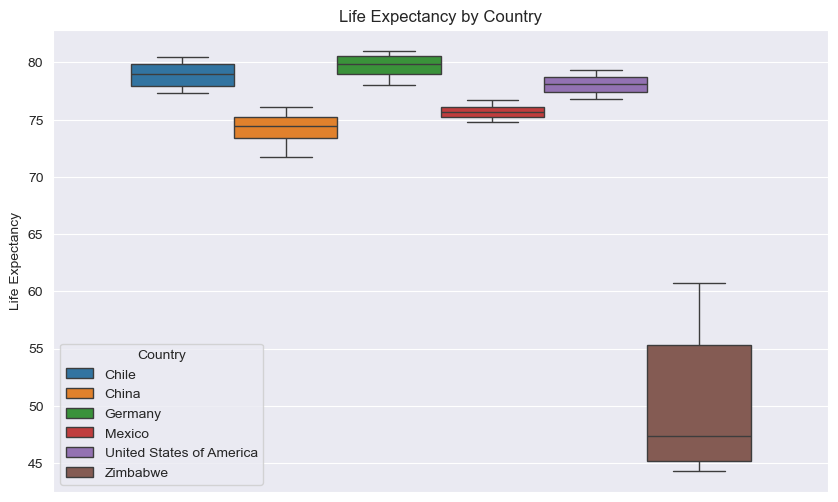

<Figure size 640x480 with 0 Axes>

In [15]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(data = life_data, hue = 'Country', y = 'Life Expectancy', legend = True)
plt.title('Life Expectancy by Country')
plt.show()
plt.clf()

Here we can easily identify Zimbabwe as an outlier with a large distribution compared to the other countries.

### GDP Analysis

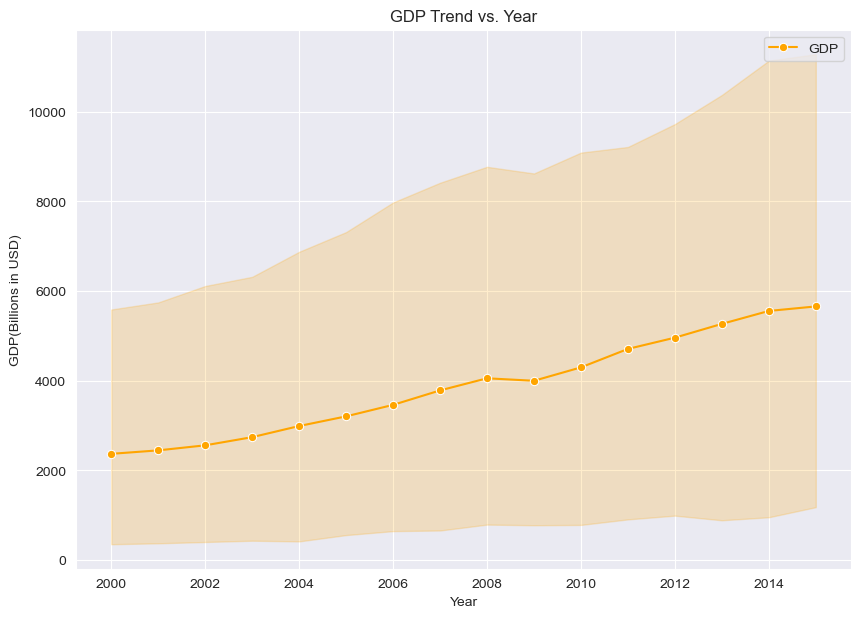

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize = (10,7))
sns.lineplot(x= 'Year', y = 'GDP', data = life_data, marker = 'o', label = 'GDP', color = 'orange')
plt.title('GDP Trend vs. Year')
plt.ylabel('GDP(Billions in USD)')
plt.show()
plt.clf()

In the figure above we see an overall positive increase YOY for GDP. It's interesting to note that as the GDP increases, the upper band of the confidence interval widens. This means that the distribution of GDP increases as it grows, and thus there is greater uncertainity around the estimated line plot. We presume that a certain Country had a steep increase which widens the band.

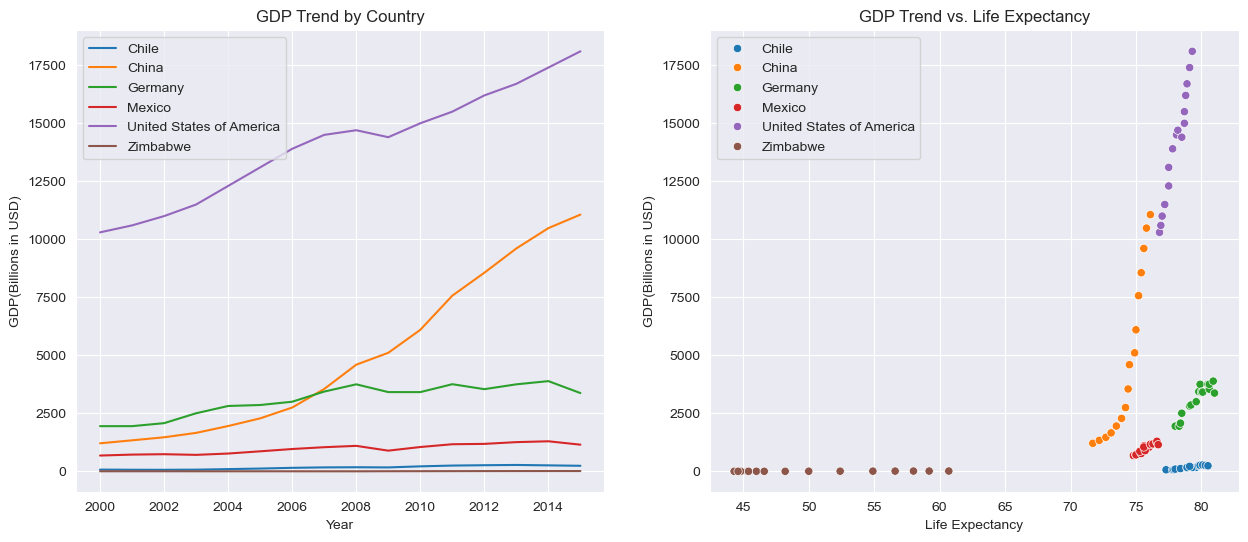

<Figure size 640x480 with 0 Axes>

In [48]:
fig = plt.figure(figsize = (15, 6))
plt.subplots_adjust(hspace = .2)

# Create the First Subplot, Chile
ax1 = plt.subplot(1, 2, 1) # 1 Row, 2 Columns, 1st Subplot
sns.lineplot(x= 'Year', y = 'GDP', data = life_data, hue = 'Country')
plt.title('GDP Trend by Country')
plt.ylabel('GDP(Billions in USD)')
plt.legend()

ax2 = plt.subplot(1, 2, 2) # 1 Row, 2 Columns, 2nd Subplot
sns.scatterplot(x= 'Life Expectancy', y = 'GDP', data = life_data, hue = 'Country')
plt.title('GDP Trend vs. Life Expectancy')
plt.ylabel('GDP(Billions in USD)')
plt.legend()

plt.show()
plt.clf()

The first graph on the left shows that Zimbabwe, Chile, and Mexico experienced minimal change in GDP from 2000 to 2014. Germany's GDP growth is characterized by a modest upward trend. In contrast, China saw a sharp increase, exhibiting the largest GDP growth among the six countries. The United States also experienced significant economic growth during this period.

In the second graph, I analyzed the relationship between GDP and Life Expectancy for the first time in this project. The data shows that, while Zimbabwe's GDP remained largely unchanged, Life Expectancy increased significantly from 44 to 62 years.

China and the USA both exhibited a sharp rise in GDP year-over-year, with only a modest increase in Life Expectancy. Germany, on the other hand, shows a positive correlation between GDP and Life Expectancy, though the trend is not as pronounced as in China or the USA.

Chile and Mexico have a very weak positive correlation between GDP and Life Expectancy, with both showing nearly flat year-over-year changes.

Overall, the trend across most countries suggests that as GDP grows, Life Expectancy tends to increase as well. The exception is Zimbabwe, which experienced significant growth in Life Expectancy but did not see a corresponding rise in GDP. Despite the relatively low starting point for Life Expectancy, Zimbabwe's GDP remained stagnant while its population lived longer.